<a href="https://colab.research.google.com/github/3sl18cs020/Project-clustering-moons/blob/main/Kalididdi_Jayarohit_Varma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
# Take make moons in built dataset

data_ = datasets.make_moons(200)

In [3]:
# check the dataset

data_

(array([[ 1.58746467e-01, -4.06408175e-02],
        [-2.04806668e-01,  9.78802446e-01],
        [ 1.50000000e+00, -3.66025404e-01],
        [ 1.17364818e+00, -4.84807753e-01],
        [ 1.99949654e+00,  4.68272067e-01],
        [ 6.43113778e-01, -4.34147860e-01],
        [ 9.28367933e-01,  3.71662456e-01],
        [ 2.98525112e-01, -2.12694171e-01],
        [-6.54860734e-01,  7.55749574e-01],
        [ 6.30552667e-01,  7.76146464e-01],
        [ 1.76604444e+00, -1.42787610e-01],
        [-7.45264450e-01,  6.66769001e-01],
        [ 8.38915426e-02,  9.90694646e-02],
        [ 1.91610846e+00,  9.90694646e-02],
        [ 7.33526186e-01, -4.63842159e-01],
        [ 2.04806668e-01,  9.78802446e-01],
        [ 6.05609687e-01,  7.95761841e-01],
        [ 9.02926538e-01,  4.29794912e-01],
        [ 3.20512986e-02,  2.48852013e-01],
        [ 4.99288823e-02,  1.87966554e-01],
        [ 9.20750043e-01, -4.96854776e-01],
        [ 1.96794870e+00,  2.48852013e-01],
        [-9.75429787e-01,  2.203

In [4]:
# create input dataframe

inputData =pd.DataFrame(data=data_[0])

In [5]:
inputData.head()

,0,1
0,0.158746,-0.040641
1,-0.204807,0.978802
2,1.500000,-0.366025
3,1.173648,-0.484808
4,1.999497,0.468272


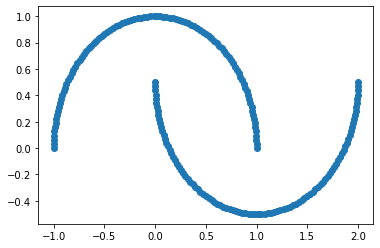

In [6]:
# create a scatter plot for inputData set
plt.scatter(inputData[0],inputData[1])

In [7]:
# create output dataframe

outputData = pd.DataFrame(data=data_[1])
outputData.head()

,0
0,1
1,0
2,1
3,1
4,1


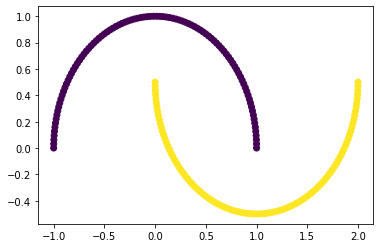

In [8]:
# create a scatter plot for outputData set
plt.scatter(inputData[0],inputData[1],c=outputData)



In [9]:
#call the  sklearn Kmeans and make a model with 200 samples
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
model.fit(inputData)
#model_fit

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# check for labels
model.labels_

array([3, 0, 2, 1, 2, 1, 4, 3, 0, 4, 2, 0, 3, 2, 1, 4, 4, 4, 3, 3, 1, 2,
       0, 2, 4, 3, 0, 1, 0, 4, 4, 1, 3, 3, 0, 4, 3, 1, 2, 1, 2, 3, 1, 2,
       4, 4, 4, 2, 4, 3, 1, 2, 4, 3, 1, 0, 0, 2, 0, 1, 4, 4, 0, 2, 2, 0,
       4, 1, 4, 3, 1, 4, 4, 1, 0, 0, 2, 1, 1, 4, 0, 3, 4, 2, 0, 3, 1, 0,
       0, 3, 0, 0, 4, 3, 2, 4, 0, 3, 0, 0, 0, 1, 4, 2, 1, 4, 4, 3, 4, 3,
       2, 4, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 3, 4, 2, 2, 4, 2, 4, 0,
       1, 3, 2, 1, 0, 0, 3, 1, 0, 1, 2, 1, 0, 0, 3, 1, 3, 1, 0, 3, 3, 1,
       3, 0, 1, 4, 1, 3, 0, 1, 4, 0, 4, 4, 0, 0, 2, 1, 1, 2, 1, 2, 0, 3,
       1, 4, 3, 4, 0, 4, 2, 2, 1, 0, 4, 0, 4, 4, 3, 3, 2, 1, 1, 0, 4, 1,
       2, 2], dtype=int32)

In [11]:
from sklearn import metrics

In [12]:
# call metrics and check silhoutte score
metrics.silhouette_score(inputData,model.labels_)



0.48774541036914976

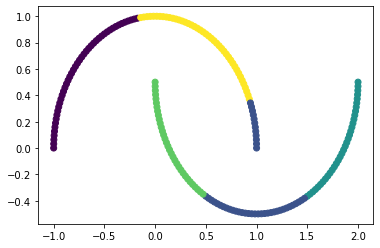

In [13]:
# create a scatter plot for inputData set with model labels color
plt.scatter(inputData[0],inputData[1],c=model.labels_)


#### finding right number of cluster

In [14]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=5)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

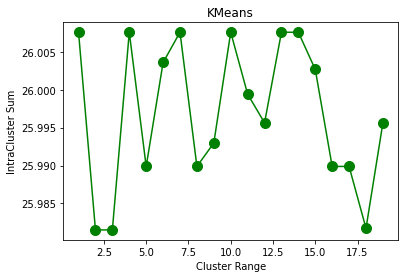

In [15]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()